In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/rolling_stone.csv')

#### Data cleaning and preparation

In [3]:
df.fillna({'rank_2012': 0, 'rank_2020': 0}, inplace=True)
df['differential'] = df['rank_2020'] - df['rank_2003']
df['decade'] = (df['release_year'] // 10) * 10
df = df[df['genre'] != 'Blues/Blues ROck']
df = df.drop_duplicates()

#### Trend Analysis of the 20 best Albums Over Time (2003 rank until 2020 rank)

In [4]:
top_30_2003 = df[df['rank_2003'] <= 30]

trend_df_top_30 = top_30_2003.melt(id_vars=['clean_name', 'album'], value_vars=['rank_2003', 'rank_2012', 'rank_2020'],
                                   var_name='year', value_name='rank')
trend_df_top_30['year'] = trend_df_top_30['year'].str.extract('(\d+)').astype(int)

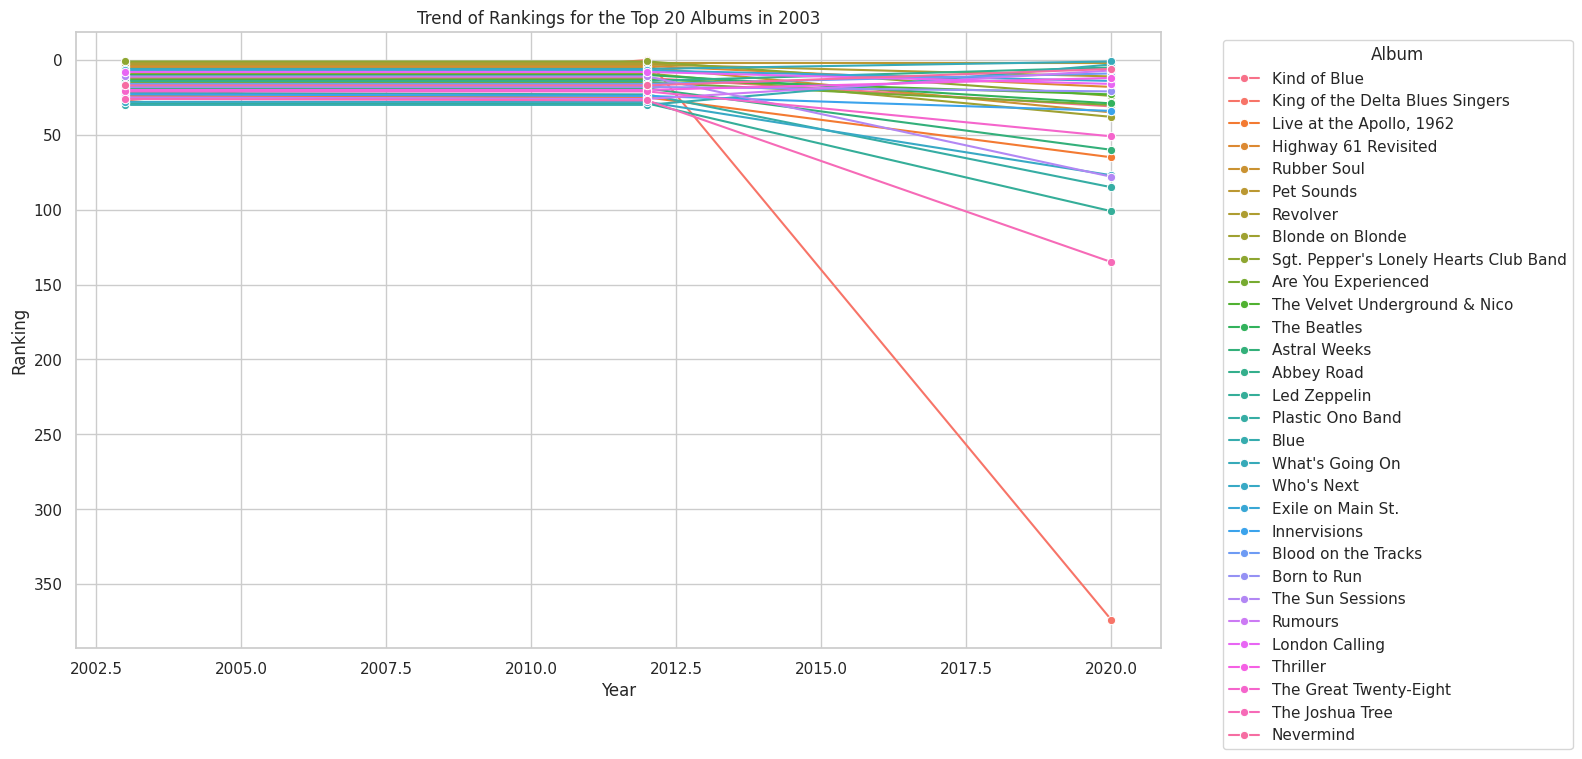

In [5]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))
sns.lineplot(data=trend_df_top_30, x='year', y='rank', hue='album', marker='o')

plt.title('Trend of Rankings for the Top 20 Albums in 2003')
plt.xlabel('Year')
plt.ylabel('Ranking')
plt.legend(title='Album', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().invert_yaxis()

plt.show()

#### Genre Popularity Visualization

In [6]:
genre_counts_df = df['genre'].value_counts().reset_index()
genre_counts_df.columns = ['genre', 'count']

genre_decade_df = df.pivot_table(index='decade', columns='genre', values='album', aggfunc='count', fill_value=0).reset_index()

<ipython-input-7-cca8e1ef592d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_counts_df, x='count', y='genre', palette='viridis')


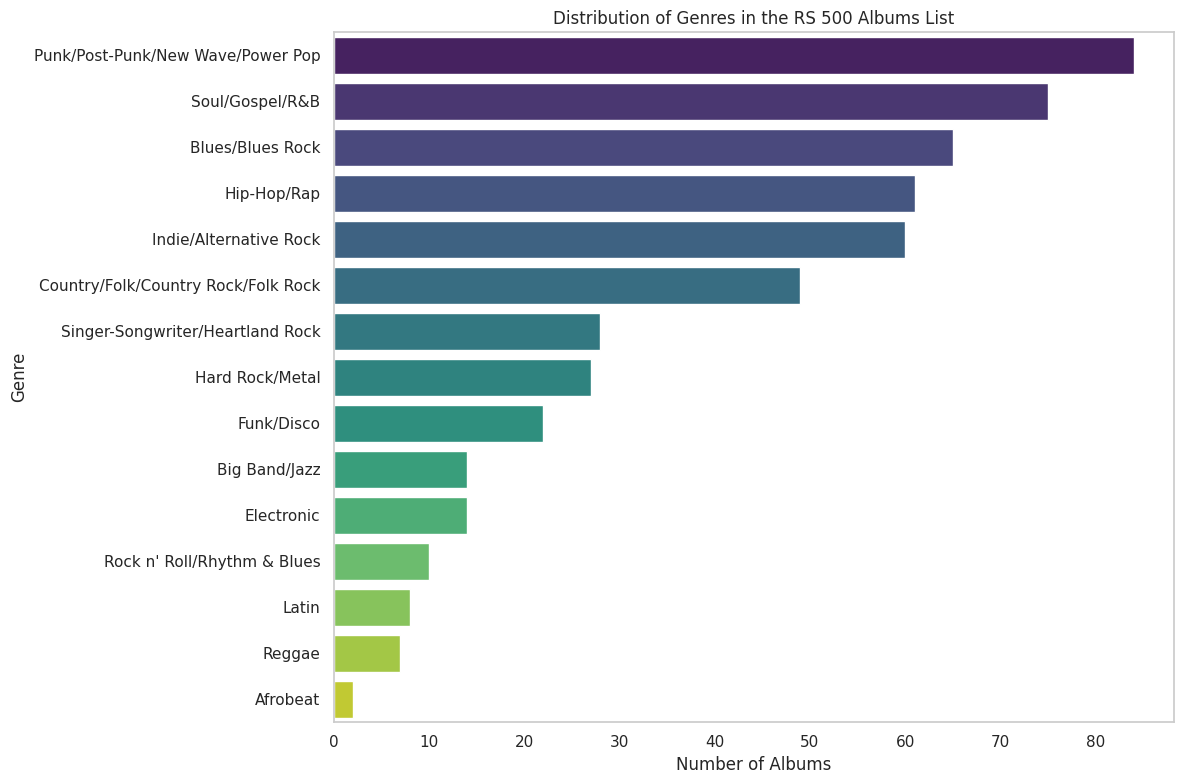

In [7]:
plt.figure(figsize=(12, 8))
sns.barplot(data=genre_counts_df, x='count', y='genre', palette='viridis')
plt.title('Distribution of Genres in the RS 500 Albums List')
plt.xlabel('Number of Albums')
plt.ylabel('Genre')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

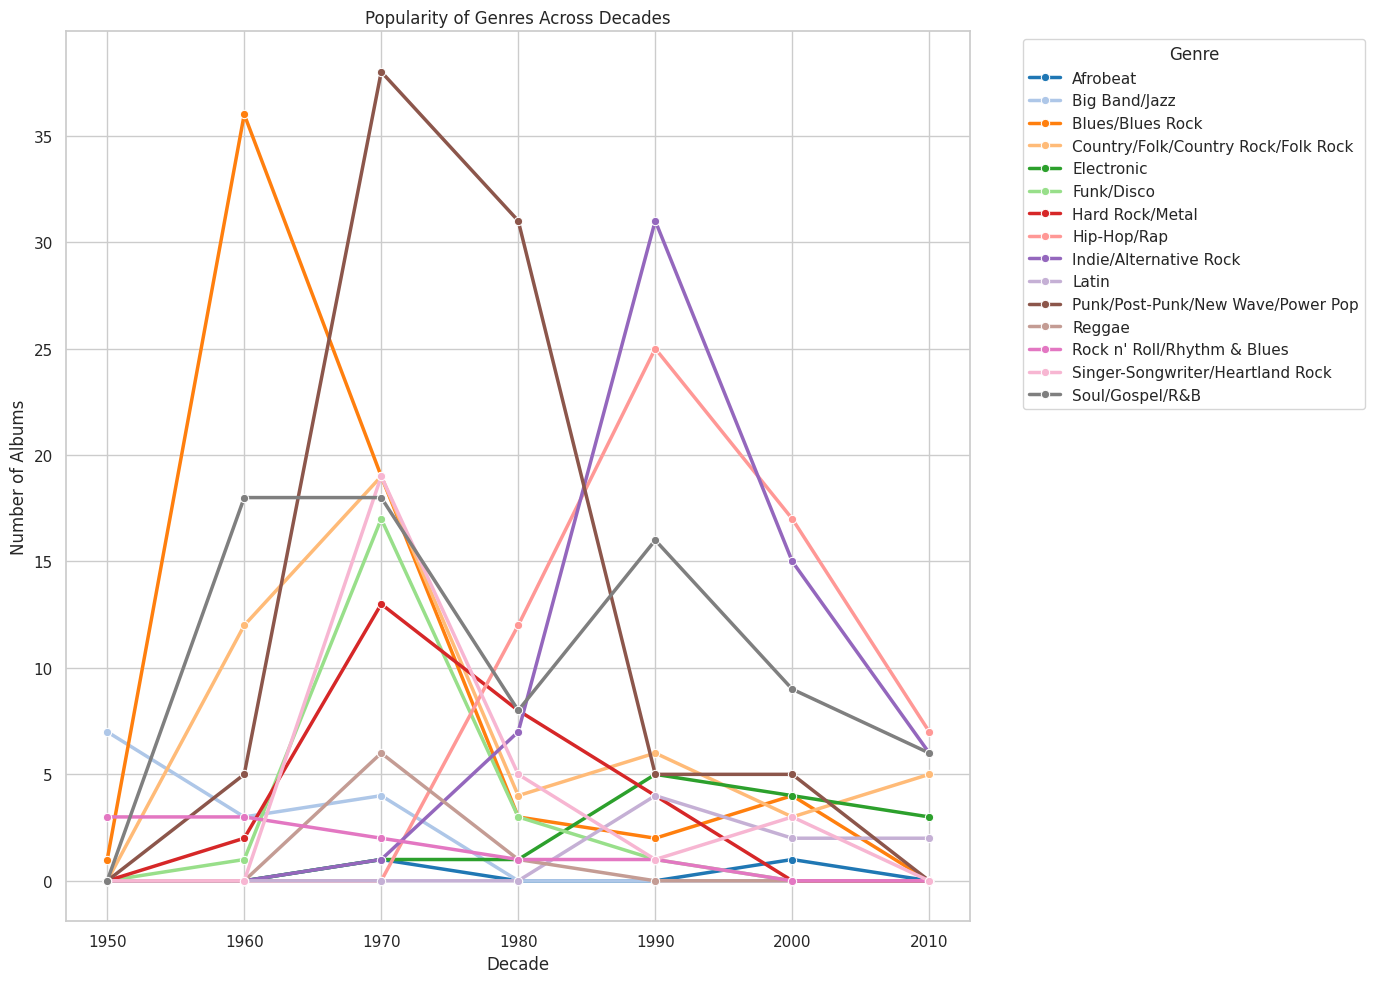

In [8]:
genre_decade_df_melted = genre_decade_df.melt(id_vars='decade', var_name='genre', value_name='count')

plt.figure(figsize=(14, 10))
sns.lineplot(data=genre_decade_df_melted, x='decade', y='count', hue='genre', marker='o', palette='tab20', linewidth=2.5)
plt.title('Popularity of Genres Across Decades')
plt.xlabel('Decade')
plt.ylabel('Number of Albums')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Artist Analysis

In [9]:
artist_counts_df = df['clean_name'].value_counts().reset_index()
artist_counts_df.columns = ['artist', 'album_count']

<ipython-input-10-959a0ba98eef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_artists, x='album_count', y='artist', palette='viridis')


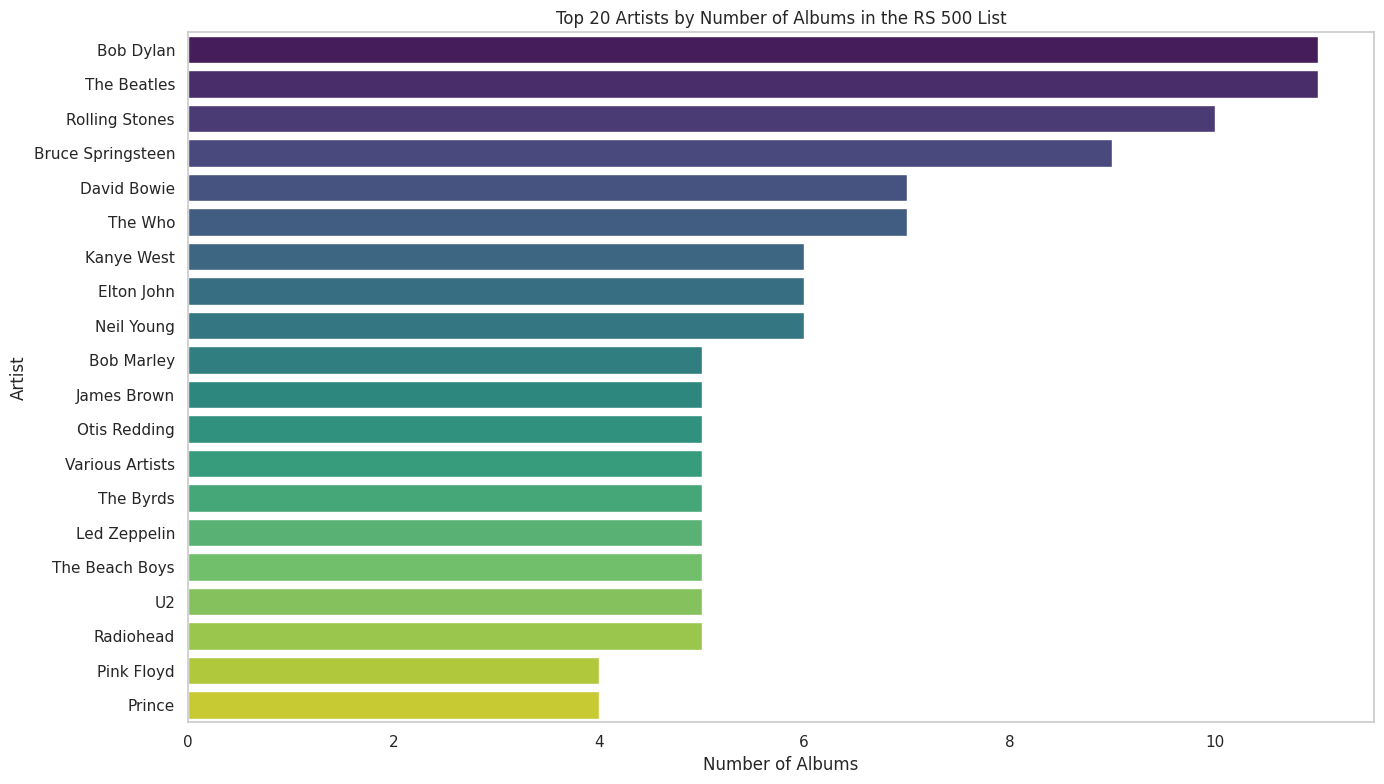

In [10]:
plt.figure(figsize=(14, 8))
top_20_artists = artist_counts_df.head(20)
sns.barplot(data=top_20_artists, x='album_count', y='artist', palette='viridis')
plt.title('Top 20 Artists by Number of Albums in the RS 500 List')
plt.xlabel('Number of Albums')
plt.ylabel('Artist')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

#### Album Release Year Analysis

In [11]:
release_year_counts_df = df['release_year'].value_counts().sort_index().reset_index()
release_year_counts_df.columns = ['release_year', 'album_count']

In [12]:
decade_counts_df = df['decade'].value_counts().sort_index().reset_index()
decade_counts_df.columns = ['decade', 'album_count']

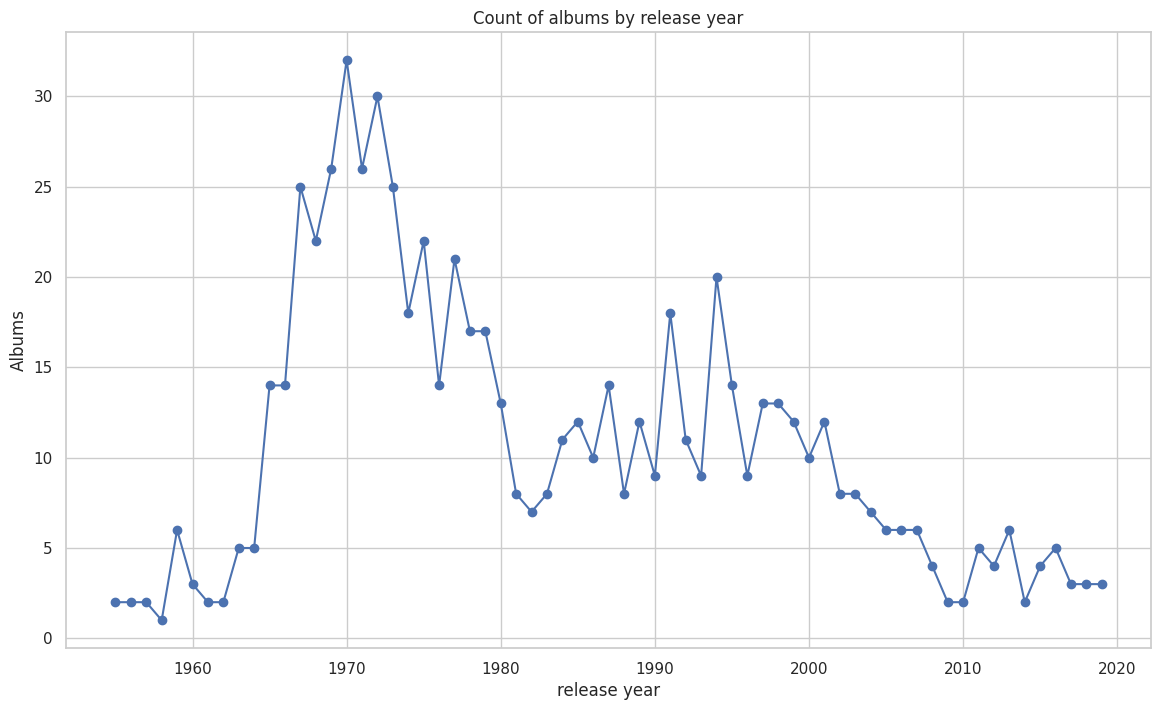

In [13]:
plt.figure(figsize=(14, 8))
plt.plot(release_year_counts_df['release_year'], release_year_counts_df['album_count'], marker='o')
plt.title('Count of albums by release year')
plt.xlabel('release year')
plt.ylabel('Albums')
plt.grid(True)
plt.show()

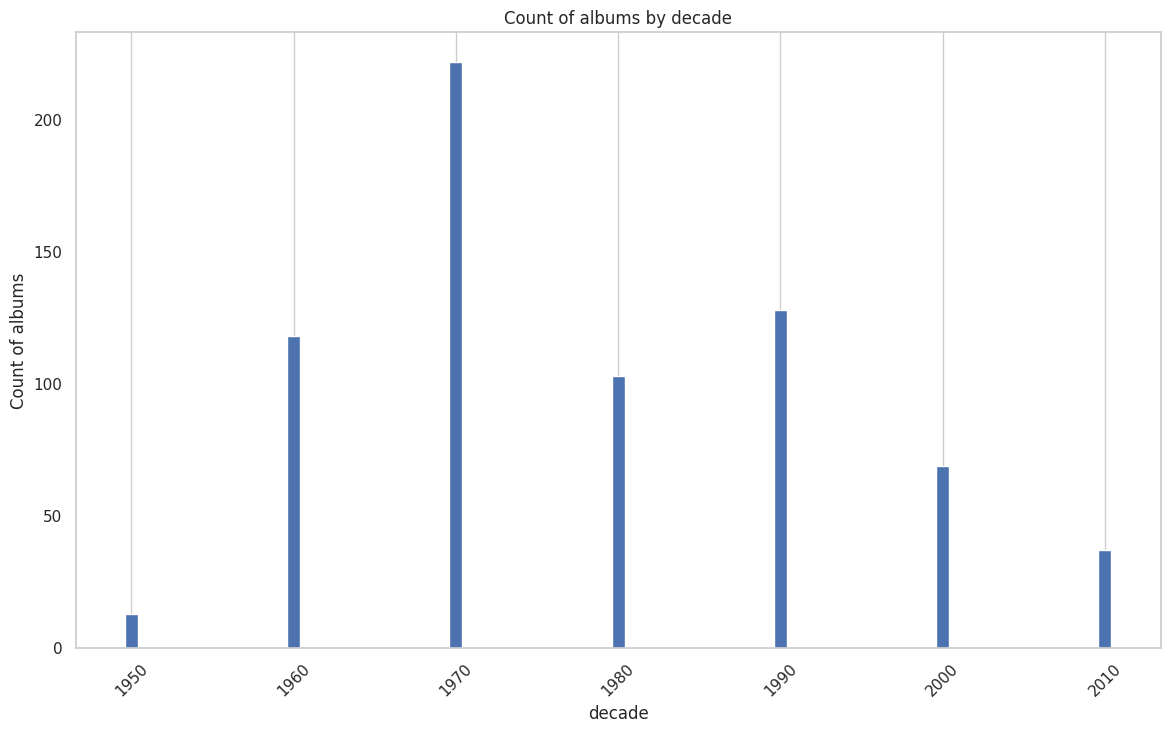

In [14]:
plt.figure(figsize=(14, 8))
plt.bar(decade_counts_df['decade'], decade_counts_df['album_count'])
plt.title('Count of albums by decade')
plt.xlabel('decade')
plt.ylabel('Count of albums')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

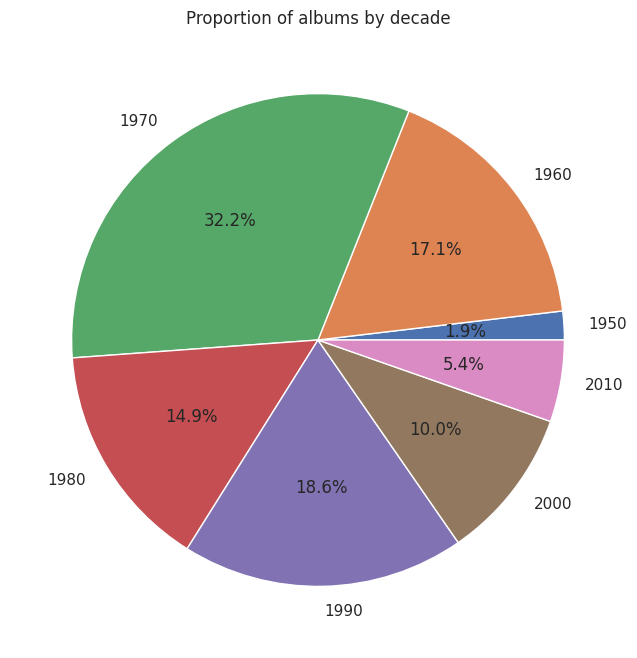

In [15]:
plt.figure(figsize=(14, 8))
plt.pie(decade_counts_df['album_count'], labels=decade_counts_df['decade'], autopct='%1.1f%%')
plt.title('Proportion of albums by decade')
plt.show()

#### Billboard Performance vs. RS Rankings

In [16]:
rs_billboard_df = df[['clean_name', 'album', 'rank_2020', 'peak_billboard_position']]

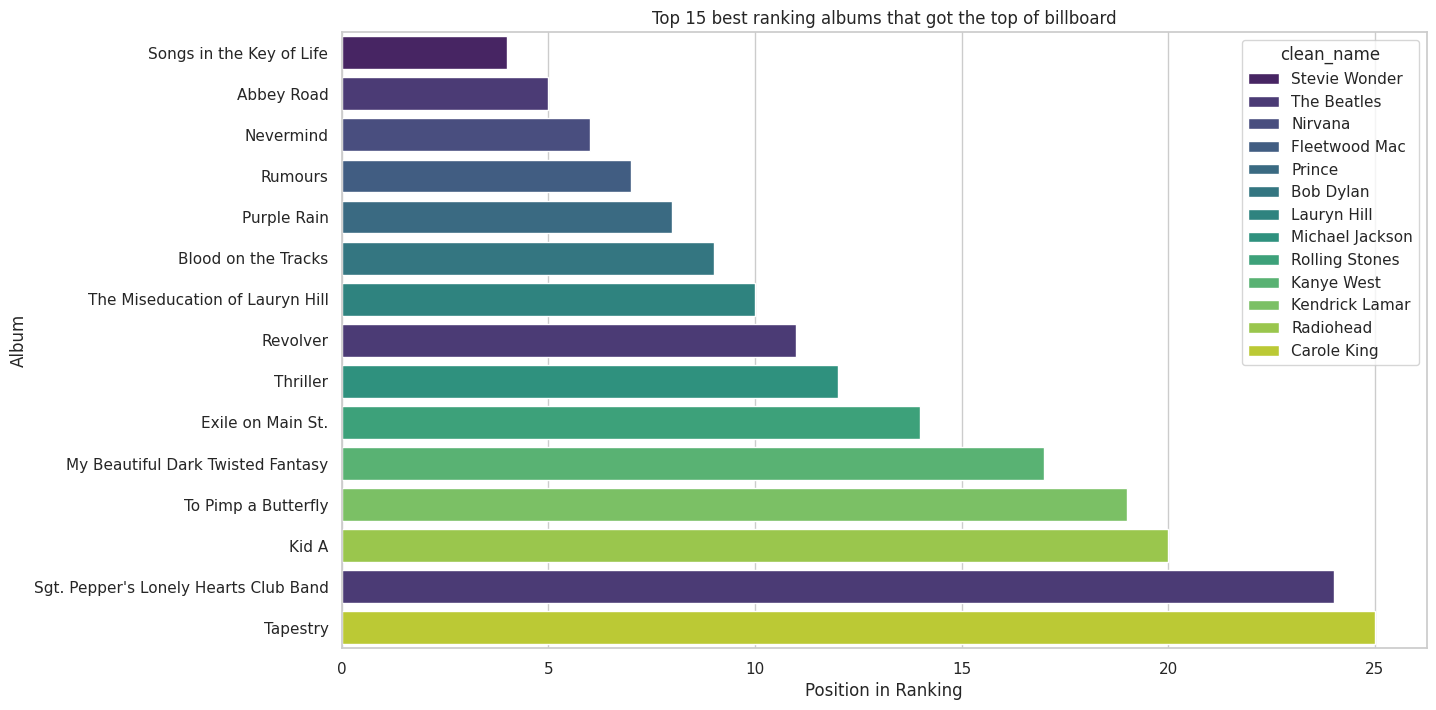

In [17]:
top_albums = rs_billboard_df[(rs_billboard_df['peak_billboard_position'] == 1) & (rs_billboard_df['rank_2020'] > 0)]
top_albums = top_albums.sort_values(by='rank_2020', ascending=True).head(15)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_albums['rank_2020'], y='album',
            data=top_albums, palette='viridis',
            hue=top_albums['clean_name'].map(lambda x: f'{x[0:]}'))
plt.title('Top 15 best ranking albums that got the top of billboard')
plt.xlabel('Position in Ranking')
plt.ylabel('Album')
plt.show()

#### Spotify Popularity Analysis

In [18]:
spotify_popularity_df = df[['clean_name', 'album', 'rank_2020', 'spotify_popularity']]

In [19]:
top_10_popular_df = df.nlargest(10, 'spotify_popularity')[['clean_name', 'album', 'spotify_popularity']]

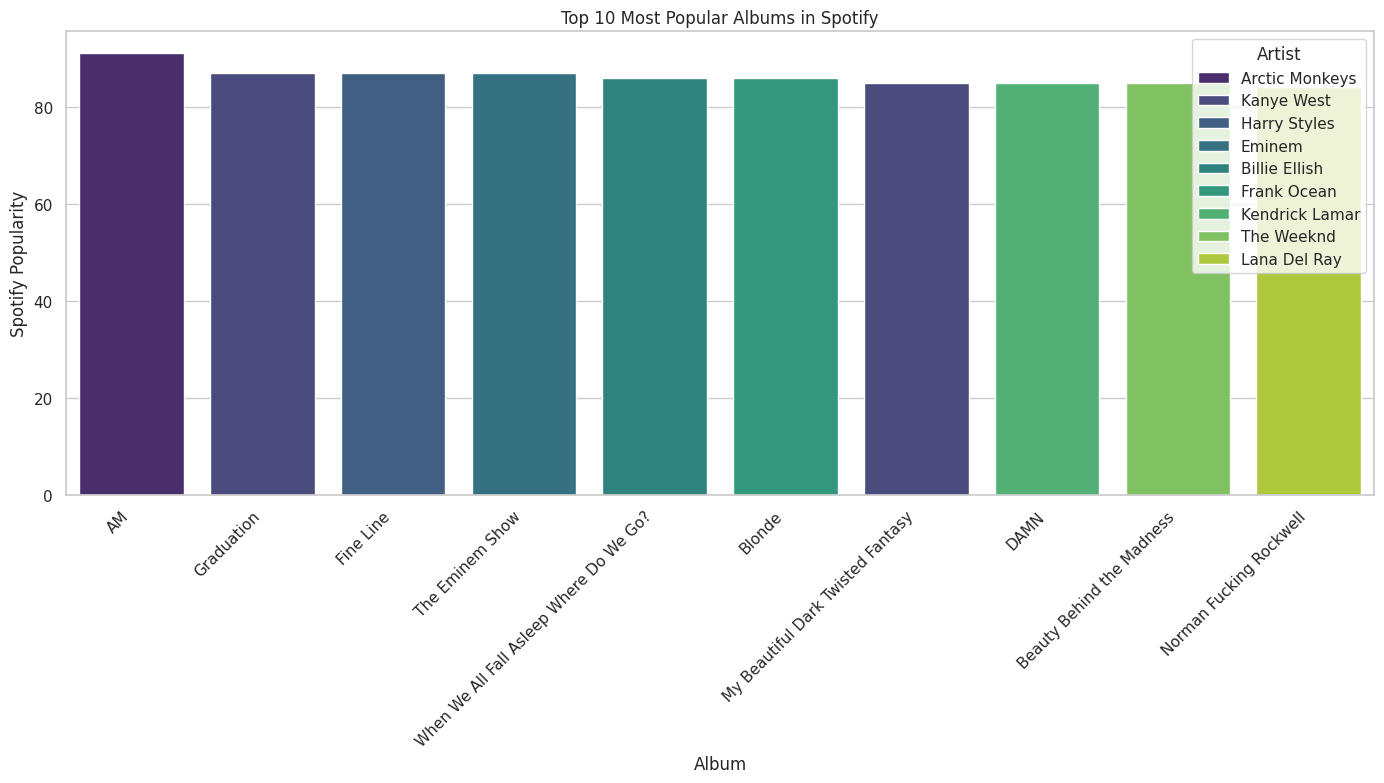

In [20]:
plt.figure(figsize=(14, 8))
sns.barplot(x=top_10_popular_df['album'], y='spotify_popularity',
            data=top_10_popular_df, palette='viridis',
            hue=top_10_popular_df['clean_name'].map(lambda x: f'{x[0:]}'))
plt.title('Top 10 Most Popular Albums in Spotify')
plt.xlabel('Album')
plt.ylabel('Spotify Popularity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Artist', loc='upper right')
plt.show()

#### Correlation between popularity in Spotify and the top 500 rank

In [21]:
correlation = df['rank_2020'].corr(df['spotify_popularity'])
print(f'Correlation between RS 500 Rank (2020) and Spotify Popularity: {correlation}')

Correlation between RS 500 Rank (2020) and Spotify Popularity: 0.009277547787263975


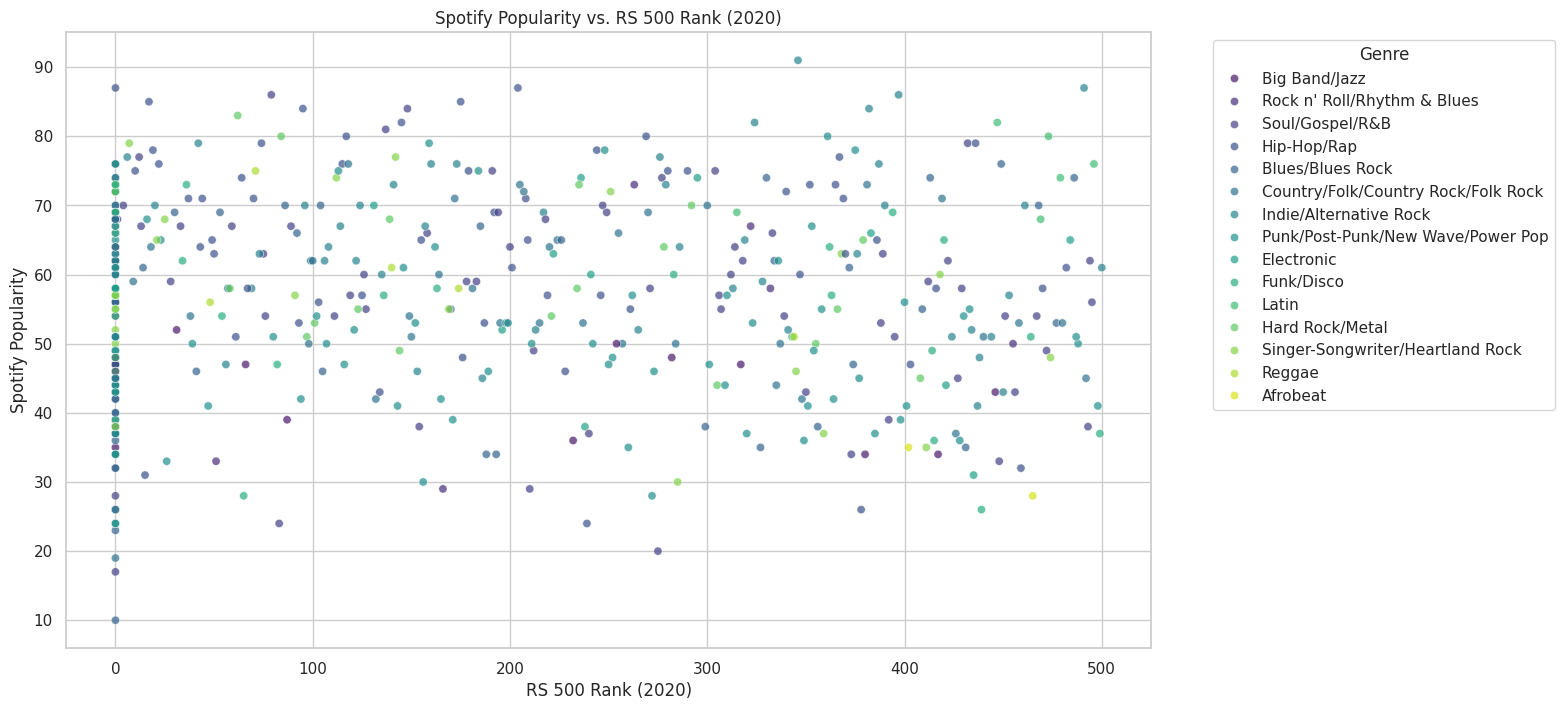

In [22]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='rank_2020', y='spotify_popularity', hue='genre', palette='viridis', alpha=0.7)
plt.title('Spotify Popularity vs. RS 500 Rank (2020)')
plt.xlabel('RS 500 Rank (2020)')
plt.ylabel('Spotify Popularity')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()